# Importing the libraries 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

# Load Data

In [2]:
dataset=pd.read_csv('Position_Salaries.csv') 
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


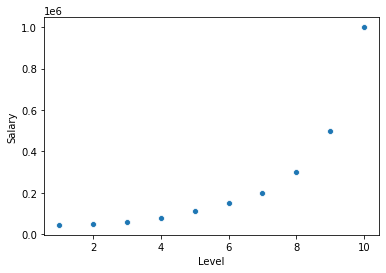

In [4]:
sns.scatterplot(x='Level', y='Salary',data = dataset);

In [5]:
x = dataset.iloc[:, 1:-1].values  
y = dataset.iloc[:, -1].values  

In [6]:
print(x[:10,:])

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [7]:
print(y[:10])

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


# Splitting the dataset into training and test set  

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 0) # func returns train and test data. It takes dataset and then split size test_size =0.3 means 30% data is for test and rest for training and random_state 


In [9]:
print(x_train[:10,:])

[[10]
 [ 2]
 [ 7]
 [ 8]
 [ 4]
 [ 1]
 [ 6]]


In [10]:
print(x_test[:10,:])

[[3]
 [9]
 [5]]


In [11]:
print(y_train[:10])

[1000000   50000  200000  300000   80000   45000  150000]


In [12]:
print(y_test[:10])

[ 60000 500000 110000]


# Build Model 

In [13]:
from sklearn.preprocessing import PolynomialFeatures
polyMatrix = PolynomialFeatures(degree=4) 
x_poly = polyMatrix.fit_transform(x_train)

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_poly,y_train) 

LinearRegression()

In [15]:
#predicting the test set results
y_pred = regressor.predict(polyMatrix.transform(x_test))

# Evaluate Model 

In [16]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, confusion_matrix, classification_report
r2_score(y_test,y_pred)

0.975539287714958

In [17]:
mean_absolute_error(y_test,y_pred)

21152.351831099426

In [18]:
mean_squared_error(y_test,y_pred)

946357779.7390695